### Houses Prices Prediction

In [253]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [254]:
train= "train.csv"
housedataset = pd.read_csv(train)

test = "test.csv"
testdataset = pd.read_csv(test)

#### Data Understanding 

Looking at the shape of the data, the distributions of the variables and possible future corrections (missing values, changing the data type, eliminating columns)

In [255]:
housedataset.shape
housedataset.info()

housedataset.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [256]:
housedataset["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

c:\Users\bianc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

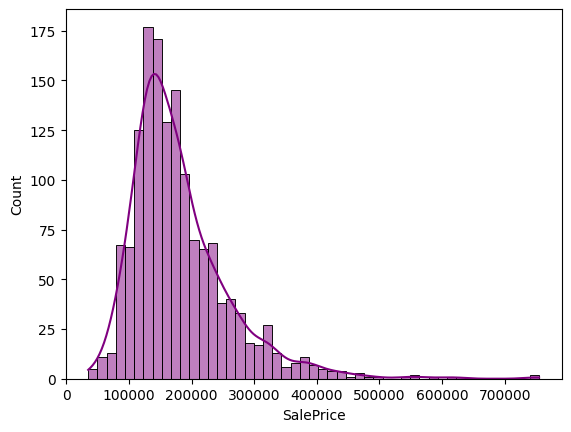

In [257]:
sns.histplot(data=housedataset, x="SalePrice", color="purple", kde=True)

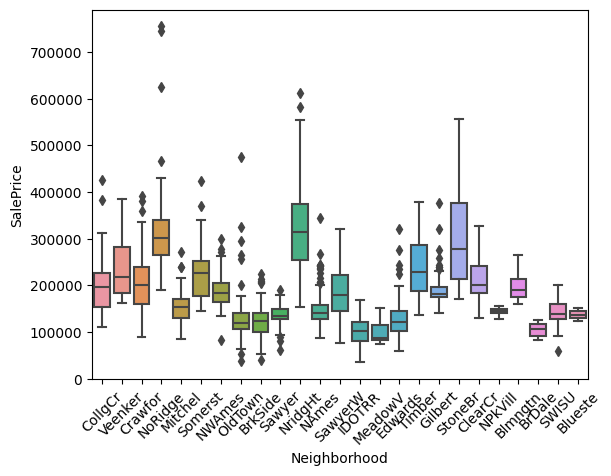

In [258]:
sns.boxplot(data=housedataset, x="Neighborhood", y="SalePrice")
plt.tick_params(axis='x', rotation=45)
#too many outliers founded in neighborhoods as NoRidge, Nright

81 columns and 1460 entries 

In [259]:
#identify columns with null or 0 as values
columns_null = housedataset.isnull().sum()
columns_0 = (housedataset == 0).sum()

#columns with more than half of null entries 
columns_half_null = columns_null[columns_null > 140].index.to_list() + columns_0[columns_0 > 140].index.to_list()
columns_half_null


['LotFrontage',
 'Alley',
 'MasVnrType',
 'FireplaceQu',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

#### Pre-processing
- remove null columns - OK
- to fill missing values 
- remove duplicates 
- adress outliers 

In [260]:
#drop columns with too many missing values 
columns_drop = columns_half_null
housedataset.drop(columns=columns_drop, inplace=True)


In [261]:
housedataset.isnull().sum().sort_values(ascending=False)

GarageFinish     81
GarageType       81
GarageYrBlt      81
GarageCond       81
GarageQual       81
BsmtFinType2     38
BsmtExposure     38
BsmtCond         37
BsmtQual         37
BsmtFinType1     37
Electrical        1
GarageCars        0
1stFlrSF          0
TotalBsmtSF       0
SaleCondition     0
SaleType          0
YrSold            0
Heating           0
HeatingQC         0
CentralAir        0
GrLivArea         0
GarageArea        0
FullBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
BsmtUnfSF         0
Functional        0
MoSold            0
PavedDrive        0
TotRmsAbvGrd      0
Id                0
MSSubClass        0
Foundation        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0


In [265]:
house_num = housedataset.select_dtypes("int","float")
house_num.head(5)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,150,856,856,1710,2,3,1,8,2,548,2,2008,208500
1,2,20,9600,6,8,1976,1976,284,1262,1262,1262,2,3,1,6,2,460,5,2007,181500
2,3,60,11250,7,5,2001,2002,434,920,920,1786,2,3,1,6,2,608,9,2008,223500
3,4,70,9550,7,5,1915,1970,540,756,961,1717,1,3,1,7,3,642,2,2006,140000
4,5,60,14260,8,5,2000,2000,490,1145,1145,2198,2,4,1,9,3,836,12,2008,250000


#### Sampling

In [ ]:
from sklearn.model_selection import train_test_split